## Week 8 Python Importing Library 

In [27]:
%load_ext autoreload
%autoreload 2
import os
import sys
sys.path.append(os.path.abspath('../Scripts'))
from data_loading import CSVReader
from eda import DataPreprocessor
# from plot import Plot
# from preprocessing import FeatureEngineering
# from credit_scoring import CreditScoring
from train_model import ModelTrainer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
# pip install mlflow

In [8]:
# Create an instance of CSVReader
read_csv_data = CSVReader('../../10_X_data/creditcard.csv')
read_csv_data1 = CSVReader('../../10_X_data/Fraud_Data.csv')
read_csv_data2 = CSVReader('../../10_X_data/IpAddress_to_Country.csv')

In [9]:
# Load the CSV file
df = read_csv_data.read_csv()
df1 = read_csv_data1.read_csv()
df2 = read_csv_data2.read_csv()

CSV file successfully loaded.
CSV file successfully loaded.
CSV file successfully loaded.


In [10]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
df1.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [12]:
df2.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [14]:
preprocessor = DataPreprocessor(df, df1, df2)

Missing values handled.
Duplicates removed.
Data types corrected.


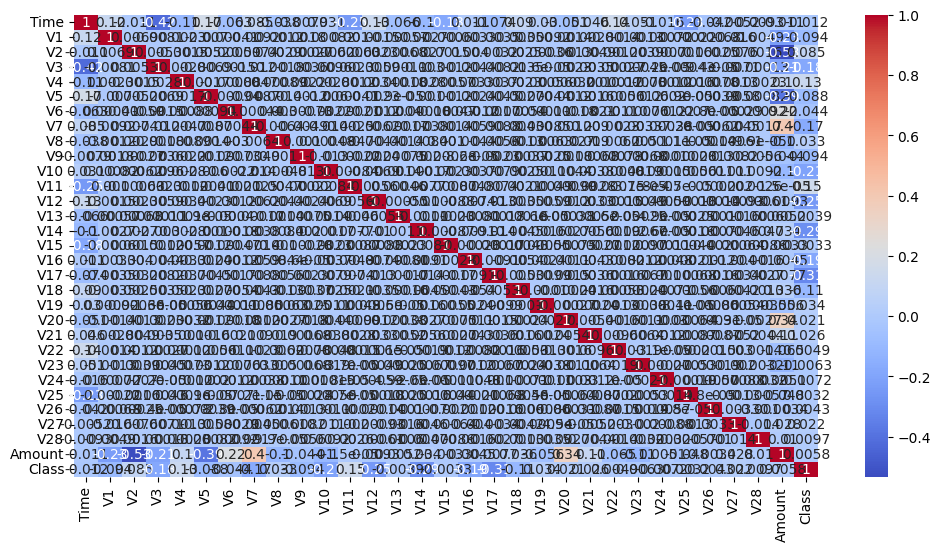

Datasets merged.
Feature engineering completed.
Normalization applied.
Categorical features encoded.
Data preprocessing complete.


In [15]:
preprocessor.preprocess()

In [16]:
df_clean, df1_clean, df2_clean = preprocessor.get_processed_data()
    
print("Preprocessing complete. Data is ready for further analysis.")

Preprocessing complete. Data is ready for further analysis.


In [19]:
df2_clean

,lower_bound_ip_address,upper_bound_ip_address,country
0,1.677722e+07,1.677747e+07,Australia
1,1.677747e+07,1.677773e+07,China
2,1.677773e+07,1.677824e+07,China
3,1.677824e+07,1.677926e+07,Australia
4,1.677926e+07,1.678131e+07,China
...,...,...,...
138841,3.758092e+09,3.758093e+09,Hong Kong
138842,3.758093e+09,3.758094e+09,India
138843,3.758095e+09,3.758096e+09,China
138844,3.758096e+09,3.758096e+09,Singapore


## Task 2 

In [ ]:
 
trainer = ModelTrainer(df_clean, df2_clean)
trainer.run_experiments()

print("Model training and evaluation complete.")